<a href="https://colab.research.google.com/github/arthurbanee/disney_data_analysis/blob/main/Disney_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

disney = pd.read_csv("/content/disney_movies.csv")

disney.columns=["Titulo", "dataLancamento", "Genero", "classIndicativa", "totBruto", "brutoInflacao"]

# Convertendo 'dataLancamento' para datetime.
disney.dataLancamento = pd.to_datetime(disney.dataLancamento)

# Convertendo 'dataLancamento' para ano.
disney['anoLancamento'] = disney['dataLancamento'].dt.year



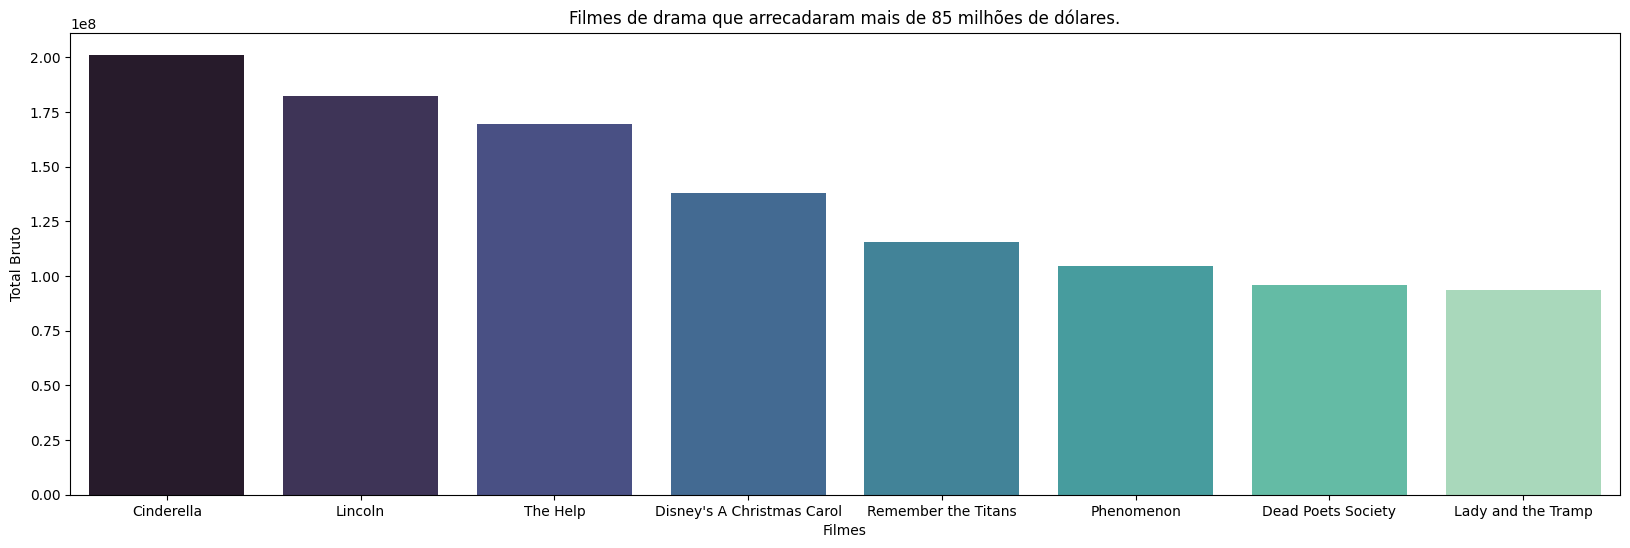

In [ ]:
# Filmes de drama com maior arrecadação

filmesDrama = disney[disney['Genero'] == 'Drama']
filmesDrama = filmesDrama[filmesDrama['totBruto'] > 85000000]
filmesDrama = filmesDrama[['Titulo', 'totBruto']]

filmesDrama = filmesDrama.sort_values(by=['totBruto'], ascending=False)


plt.figure(figsize=(20,6))
sns.barplot(x='Titulo', y='totBruto', data=filmesDrama,
            palette="mako",
            hue= "Titulo")
plt.xlabel('Filmes')
plt.ylabel('Total Bruto')
plt.title("Filmes de drama que arrecadaram mais de 85 milhões de dólares.")
plt.show()

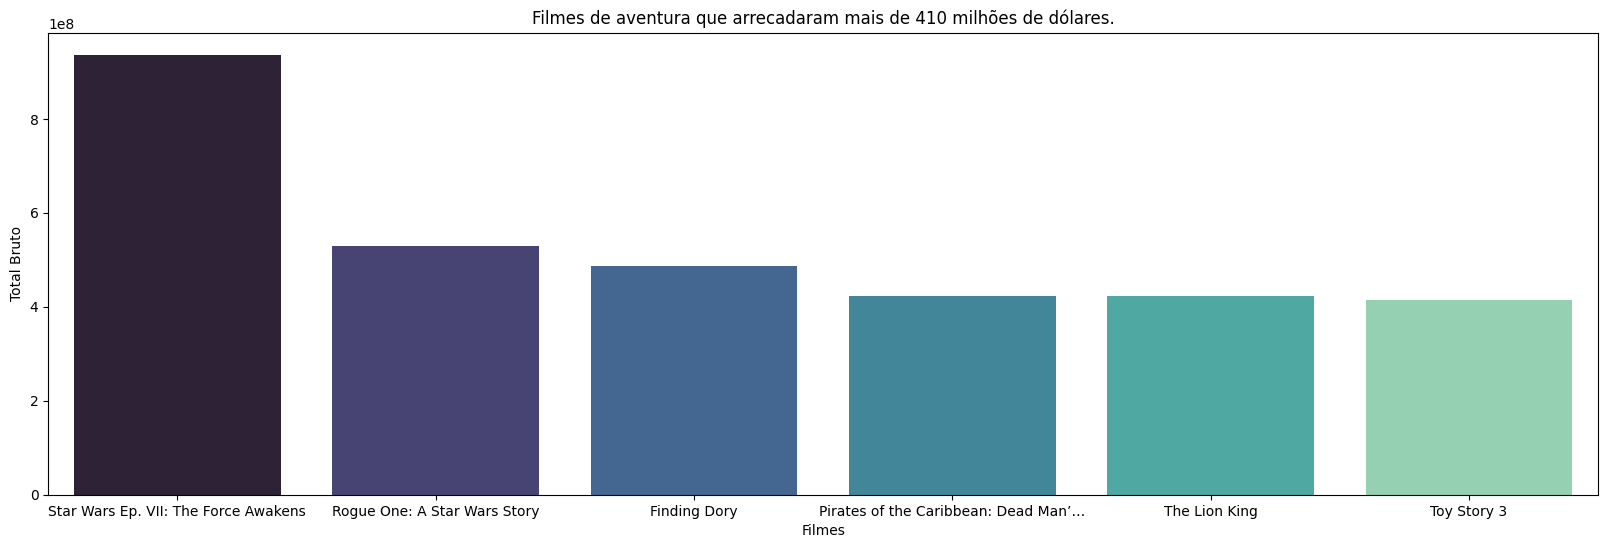

In [ ]:
# Filmes de aventura que arrecadaram mais de 450 milhões de dólares.

filmesAventura = disney[disney['Genero'] == 'Adventure']
filmesAventura = filmesAventura[filmesAventura['totBruto'] > 410000000]
filmesAventura = filmesAventura[['Titulo', 'totBruto']]

filmesAventura = filmesAventura.sort_values(by=['totBruto'], ascending=False)


plt.figure(figsize=(20,6))
sns.barplot(x='Titulo', y='totBruto', data=filmesAventura,
            palette="mako",
            hue= "Titulo")
plt.xlabel('Filmes')
plt.ylabel('Total Bruto')
plt.title("Filmes de aventura que arrecadaram mais de 410 milhões de dólares.")
plt.show()

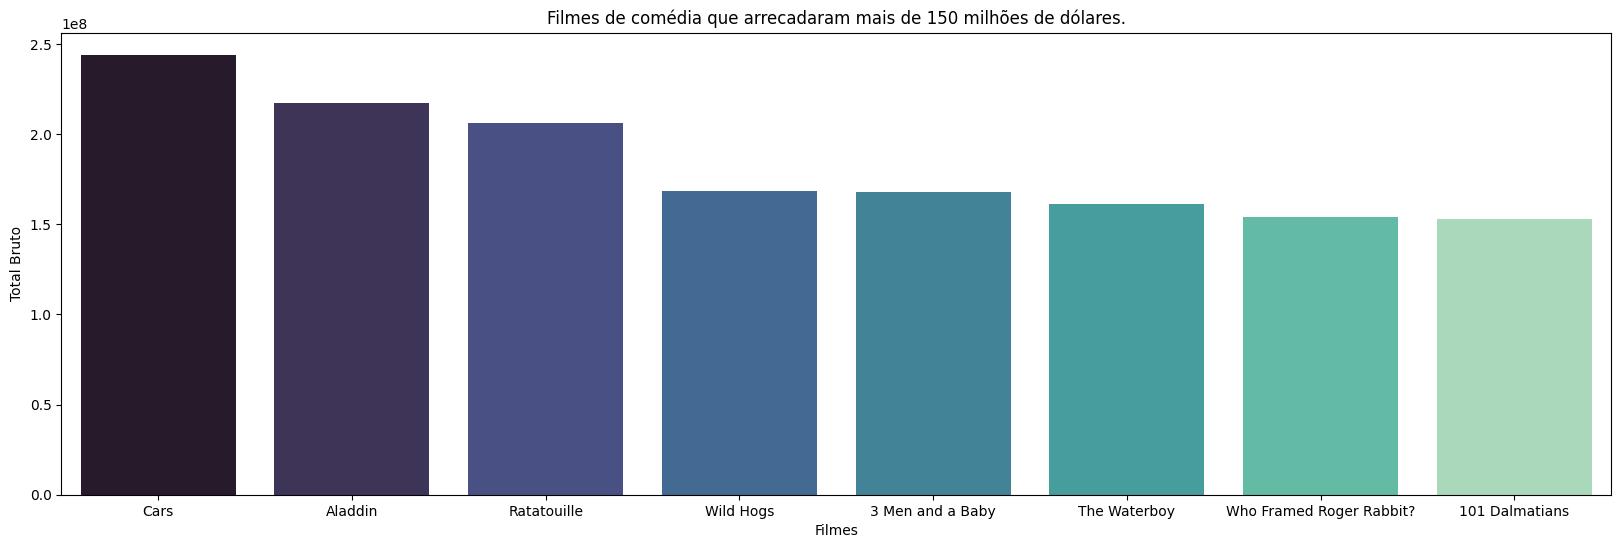

In [ ]:
# Filmes de comédia que arrecadaram mais de 150 milhões de dólares.

filmesComedy = disney[disney['Genero'] == 'Comedy']
filmesComedy = filmesComedy[filmesComedy['totBruto'] > 150000000]
filmesComedy = filmesComedy[['Titulo', 'totBruto']]

filmesComedy = filmesComedy.sort_values(by=['totBruto'], ascending=False)


plt.figure(figsize=(20,6))
sns.barplot(x='Titulo', y='totBruto', data=filmesComedy,
            palette="mako",
            hue= "Titulo")
plt.xlabel('Filmes')
plt.ylabel('Total Bruto')
plt.title("Filmes de comédia que arrecadaram mais de 150 milhões de dólares.")
plt.show()

<ipython-input-164-650e66bd57c1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filmes_por_ano_filtrado.index, y=filmes_por_ano_filtrado.values, palette="mako")


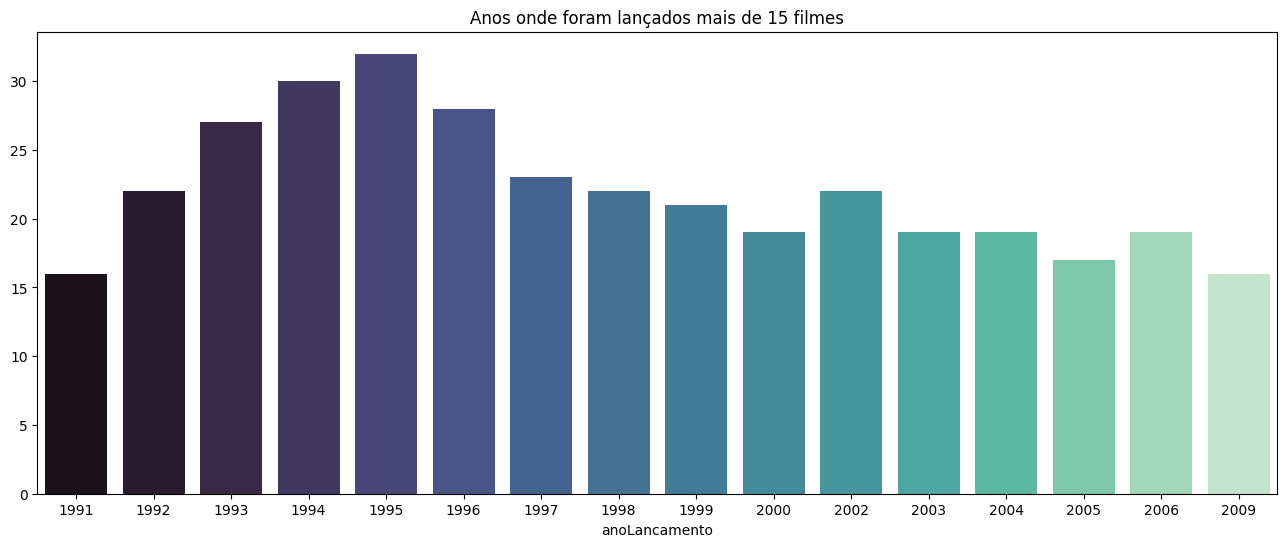

In [ ]:
# Anos que tiveram mais filmes lançados

# Contagem de filmes lançados por ano.
filmes_por_ano = disney['anoLancamento'].value_counts()

# Anos que tiveram mais de 5 lançamentos naquele ano.
filmes_por_ano_filtrado = filmes_por_ano[filmes_por_ano > 15]

plt.figure(figsize=(16,6))
sns.barplot(x=filmes_por_ano_filtrado.index, y=filmes_por_ano_filtrado.values, palette="mako")
plt.title("Anos onde foram lançados mais de 15 filmes")
plt.show()

<ipython-input-168-76062e28ed2b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=generosLucrativos.index, y=generosLucrativos.values, palette="mako")


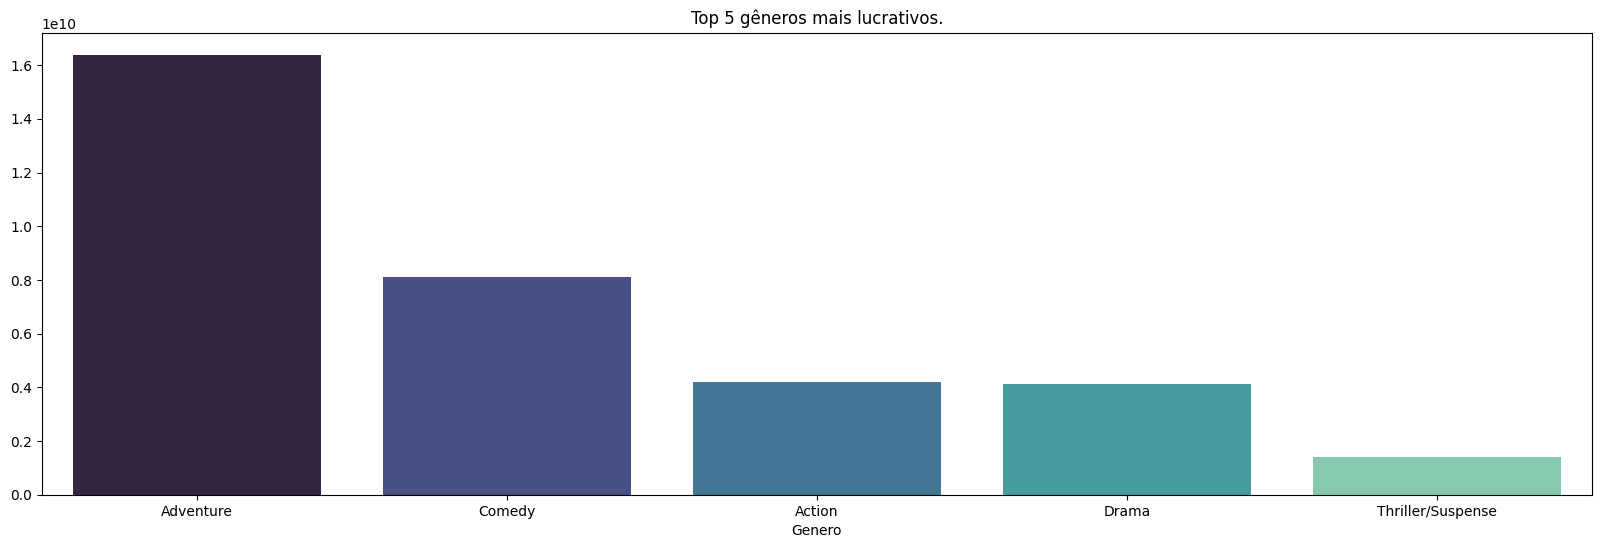

In [ ]:
# Top 5 gêneros mais lucrativos

generosLucrativos = disney.groupby('Genero')['totBruto'].sum()

generosLucrativos = generosLucrativos.sort_values(ascending=False)

generosLucrativos = generosLucrativos.head(5)

plt.figure(figsize=(20,6))
sns.barplot(x=generosLucrativos.index, y=generosLucrativos.values, palette="mako")
plt.title("Top 5 gêneros mais lucrativos.")
plt.show()


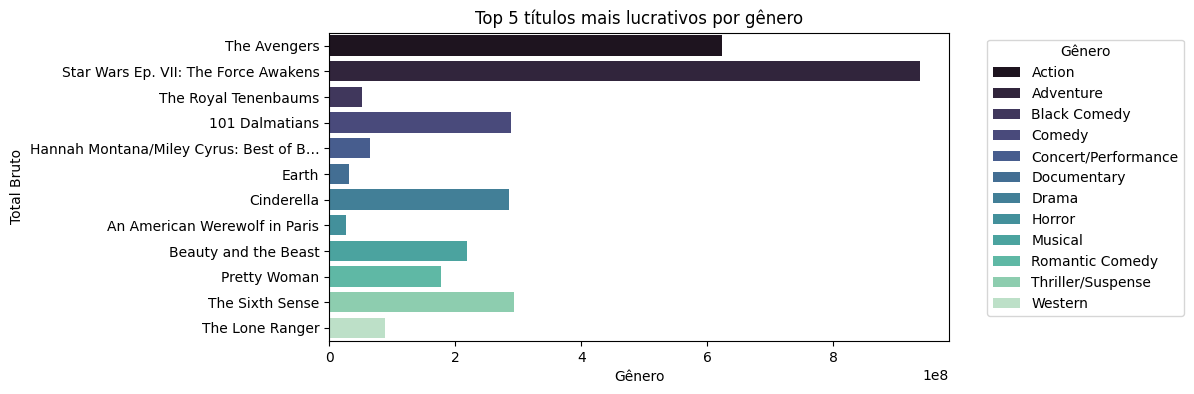

In [ ]:
# Filmes mais lucrativos de cada gênero

# Agrupando por gênero e título, somando os totais brutos
titulosLucrativos = disney.groupby(['Genero', 'Titulo'])['totBruto'].sum()

# Resetando o índice para que 'Genero' e 'Titulo' se tornem colunas
titulosLucrativos = titulosLucrativos.reset_index()

# Ordenando por gênero e totBruto dentro de cada gênero
titulosLucrativos = titulosLucrativos.sort_values(by=['Genero', 'totBruto'], ascending=False)

# Encontrando o filme mais lucrativo de cada gênero
filmePorGenero = titulosLucrativos.loc[titulosLucrativos.groupby('Genero')['totBruto'].idxmax()]

# Selecionando os top 5 títulos mais lucrativos de cada gênero
top5 = titulosLucrativos.groupby('Genero').head(5)

# Montando o gráfico
plt.figure(figsize=(8,4))
sns.barplot(x='totBruto', y='Titulo', data=filmePorGenero, dodge=False, palette="mako", hue='Genero')
plt.xlabel('Gênero')
plt.ylabel('Total Bruto')
plt.title("Top 5 títulos mais lucrativos por gênero")
plt.legend(title="Gênero", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

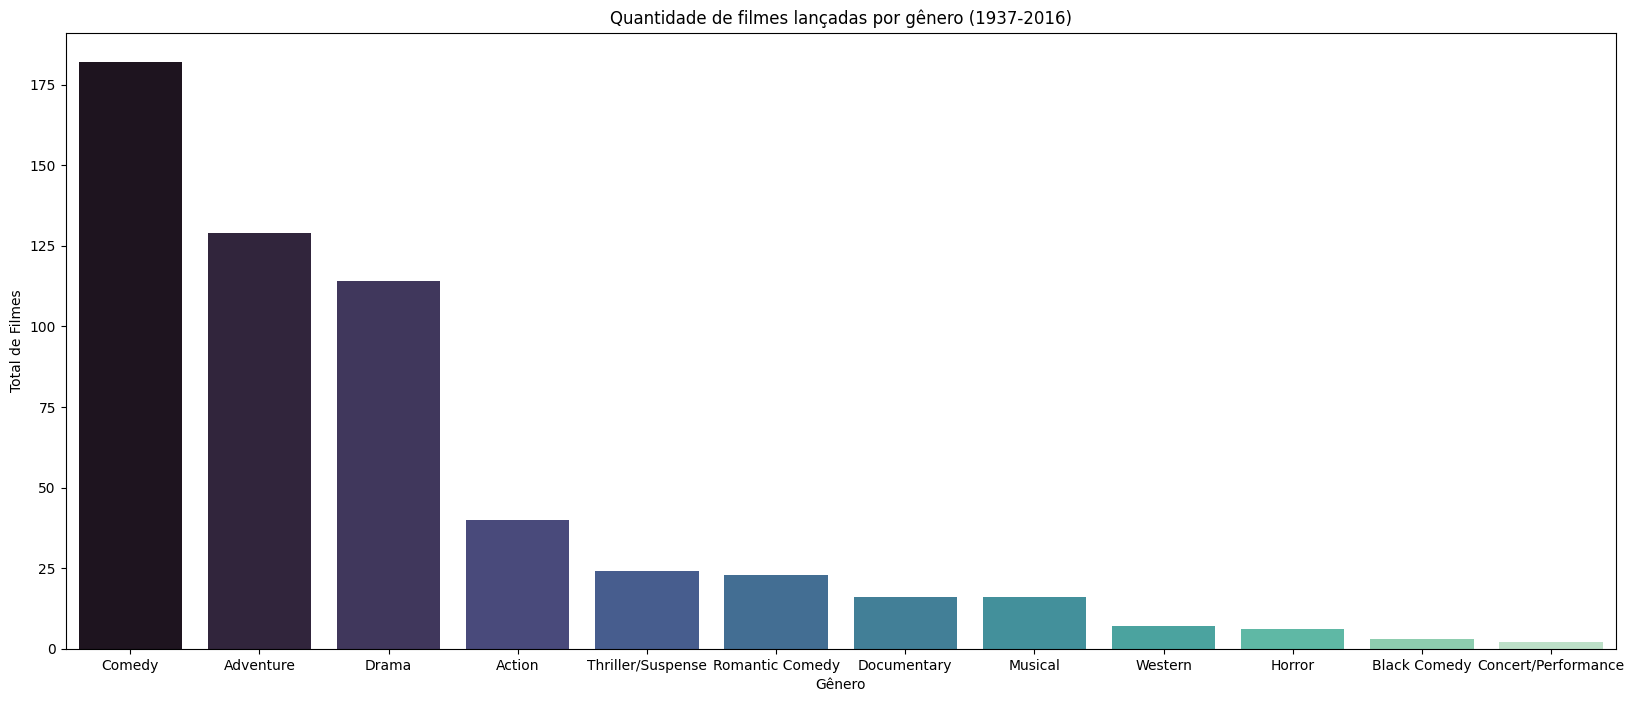

In [ ]:
# Quantidade de filmes lançados por gênero

qtdFilmes = disney.groupby('Genero')['Titulo'].count().sort_values(ascending=False)
qtdFilmes = qtdFilmes.to_frame().reset_index()
qtdFilmes.columns = ['Gênero', 'Total de Filmes']

plt.figure(figsize=(20,8))
sns.barplot(x='Gênero', y='Total de Filmes', data=qtdFilmes, palette="mako", hue="Gênero")
plt.title("Quantidade de filmes lançadas por gênero (1937-2016)")
plt.show()

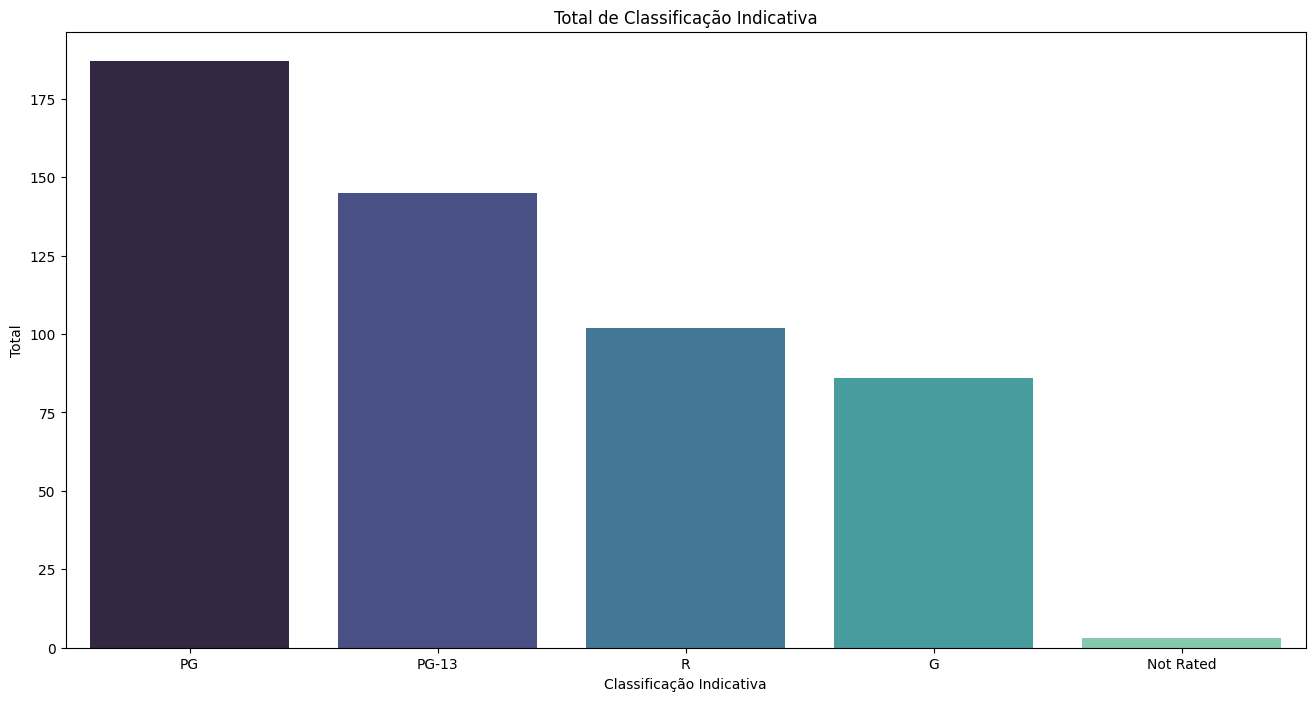

In [ ]:
# Total de classificação indicativa.

classIndicativa = disney.groupby('classIndicativa')['Titulo'].count().sort_values(ascending=False)
classIndicativa = classIndicativa.to_frame().reset_index()
classIndicativa.columns = ['Classificação Indicativa', 'Total']

plt.figure(figsize=(16,8))
sns.barplot(x='Classificação Indicativa', y='Total', data=classIndicativa, palette="mako", hue="Classificação Indicativa")
plt.title("Total de Classificação Indicativa")
plt.show()

# PG - Sugestão de orientação parental;
# PG 13 - Pais fortemente advertidos;
# R - Restrito;
# G - Público em geral;
# Not Rated - Não avaliada;